<a href="https://colab.research.google.com/github/Baudier13/CD2024/blob/main/Tarea4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea Nº4: Mitigación de ruido con PCA

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statistics

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    precision_score,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

## Parte 1: Digits dataset


### a) Considerar el dataset Digits provisto por scikit-learn. Determinar el número de features, samples y classes y el tamaño en píxeles de las imágenes.



In [2]:
from sklearn.datasets import load_digits

digits = load_digits()       # type(digits) >>  <class 'sklearn.utils._bunch.Bunch'>
target_names = digits.target_names

n_features = len(digits.feature_names)
n_samples = len(digits.images)
n_clases = len(digits.target_names)
tam_imagenes = np.shape(digits.images)[-2:]

print()
print("features",n_features)
print("samples",n_samples)
print("classes", n_clases)
print("tam imagenes", tam_imagenes)


features 64
samples 1797
classes 10
tam imagenes (8, 8)


### b) Separar un conjunto de entrenamiento reservando un 25 % de los datos para test. Estratificar los conjuntos usando la clase y usar la semilla 42. A continuación normalizar los datos.


In [3]:
# Separar las características (X) y las etiquetas (y)
X = digits.data
y = digits.target

# Dividir los datos en conjuntos de entrenamiento y prueba (75% entrenamiento, 25% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Verificar las formas de los conjuntos
print("Forma de X_train_normalized:", X_train_normalized.shape)
print("Forma de X_test_normalized:", X_test_normalized.shape)

Forma de X_train_normalized: (1347, 64)
Forma de X_test_normalized: (450, 64)


In [4]:
X_train = X_train_normalized
X_test = X_test_normalized

### c) Graficar las primeras 10 imagenes, respetando el factor de forma original. ¿Cuál es?

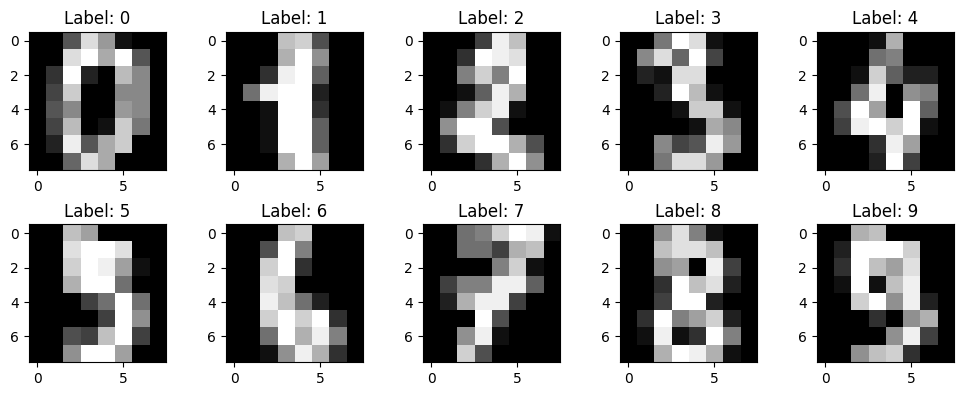

In [5]:
# Graficar las primeras 10 imágenes
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 4))

for ax, image, label in zip(axes.flat, X[:10], y[:10]):
    ax.imshow(image.reshape(8, 8), cmap='gray')
    ax.set_title(f'Label: {label}')

plt.tight_layout()
plt.show()

El tamaño de la figura se ajusta para respetar el factor de forma original de las imágenes (8x8 píxeles).

## Parte 2: Hyperparameter Tunning of k-nearest Neighbors


### d) Implementar una búsqueda del valor óptimo de vecinos cercanos para KNeighborsClassifier, usando el modelo GridSearchCV, ambos de scikit-learn. Usar los valores default de los parámetros de KNeighborsClassifier, ¿qué métrica de distancia se usa? Realizar la búsqueda con k ∈ {2, 3, 4, 5, 6, 7, 8, 9, 10}, usando 10-fold cross-validation. ¿De qué tamaño resultan los conjuntos de validación?


In [6]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Definir el modelo KNeighborsClassifier
knn_model = KNeighborsClassifier()

# Definir los parámetros a buscar
param_grid = {'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Definir el GridSearchCV con 10-fold cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=10)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Mostrar los resultados
print("Mejor valor de k encontrado:", grid_search.best_params_['n_neighbors'])
print("Exactitud del mejor modelo en conjunto de prueba:", grid_search.best_score_)

Mejor valor de k encontrado: 5
Exactitud del mejor modelo en conjunto de prueba: 0.9791984521835267



### e) Reportar el mejor valor de k hallado y el correspondiente mean test score. Graficar accuracy en función de k ∈ {2, 3, 4, 5, 6, 7, 8, 9, 10}.


Mejor valor de k encontrado: 5
Mean test score correspondiente: 0.9791984521835267


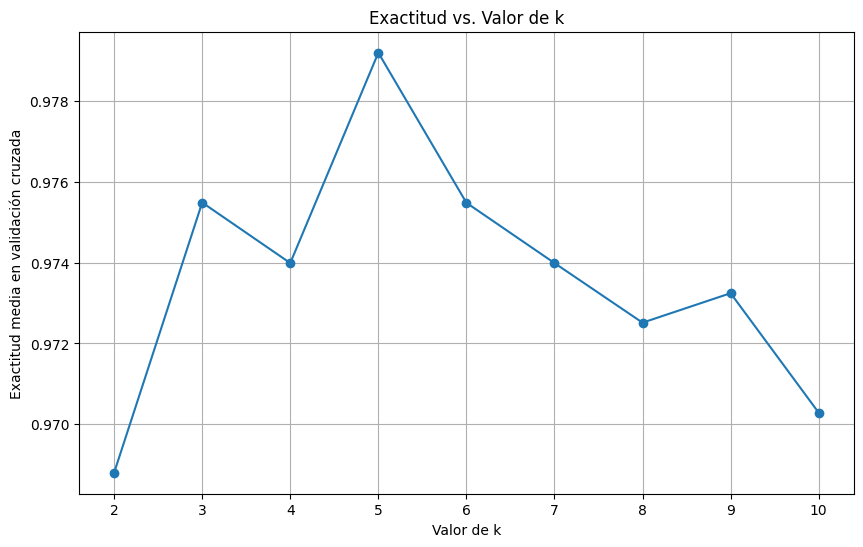

In [7]:
# Obtener los resultados de GridSearchCV
results = grid_search.cv_results_
k_values = param_grid['n_neighbors']
mean_test_scores = results['mean_test_score']

# Encontrar el índice del mejor valor de k
best_k_idx = np.argmax(mean_test_scores)
best_k = k_values[best_k_idx]
best_score = mean_test_scores[best_k_idx]

# Reportar el mejor valor de k y el mean test score correspondiente
print("Mejor valor de k encontrado:", best_k)
print("Mean test score correspondiente:", best_score)

# Graficar accuracy en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_test_scores, marker='o')
plt.title("Exactitud vs. Valor de k")
plt.xlabel("Valor de k")
plt.ylabel("Exactitud media en validación cruzada")
plt.xticks(k_values)
plt.grid(True)
plt.show()


### f) Evaluar KNeighborsClassifier con valor de k óptimo sobre el set de test. Reportar la salida de classification report y mostrar la matriz de confusión. ¿Qué dígitos se confunden con cuales otros? ¿Condice la accuracy sobre el set de test con la mejor encontrada en la búsqueda en grilla? ¿Puede decirse que el modelo sufre de overfitting? Explicar.

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       0.94      1.00      0.97        46
           2       0.96      1.00      0.98        44
           3       0.98      0.98      0.98        46
           4       0.98      0.93      0.95        45
           5       0.98      0.96      0.97        46
           6       0.98      0.98      0.98        45
           7       0.92      0.98      0.95        45
           8       0.97      0.91      0.94        43
           9       0.95      0.91      0.93        45

    accuracy                           0.96       450
   macro avg       0.97      0.96      0.96       450
weighted avg       0.97      0.96      0.96       450



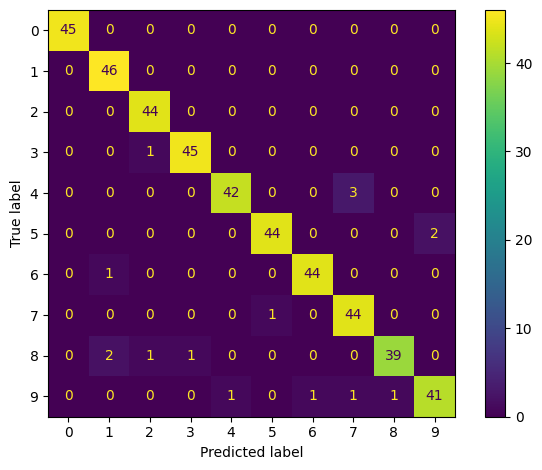

In [8]:
from sklearn.metrics import classification_report, confusion_matrix

# Crear un nuevo modelo KNeighborsClassifier con el mejor valor de k encontrado
best_knn_model = KNeighborsClassifier(n_neighbors=best_k)

# Entrenar el modelo con los datos de entrenamiento completos (X_train, y_train)
best_knn_model.fit(X_train, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = best_knn_model.predict(X_test)

# Mostrar el classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Mostrar la matriz de confusión
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=target_names)
plt.tight_layout()
plt.show()


¿Qué dígitos se confunden con cuales otros?
La matriz de confusión te dará una idea de qué dígitos se están confundiendo entre sí. Cada celda de la matriz representa el número de veces que una clase verdadera se ha clasificado como otra clase. Por ejemplo, si la fila correspondiente al dígito 3 y la columna correspondiente al dígito 5 tiene un valor alto, significa que el modelo está confundiendo el dígito 3 con el dígito 5 con frecuencia.
¿Coincide la accuracy sobre el set de test con la mejor encontrada en la búsqueda en grilla?
La exactitud en el conjunto de prueba podría no coincidir exactamente con la mejor encontrada en la búsqueda en grilla. Esto puede deberse a la variabilidad de los datos de prueba y a cómo se dividen los conjuntos de entrenamiento y prueba. Sin embargo, deberían estar cercanos.
¿Puede decirse que el modelo sufre de overfitting?
Para determinar si el modelo sufre de overfitting, es útil comparar el rendimiento en el conjunto de entrenamiento y en el conjunto de prueba. Si el modelo tiene un rendimiento significativamente mejor en el conjunto de entrenamiento en comparación con el conjunto de prueba, podría estar sufriendo de overfitting. También puedes usar técnicas como curvas de aprendizaje o validación cruzada para evaluar el rendimiento del modelo en diferentes conjuntos de datos.

## Parte 3: PCA



### g) Calcular PCA con 30 componentes sobre el conjunto de entrenamiento. Graficar la varianza explicada acumulada en función del número de componentes. Verificar en el gráfico que el 70 % de la varianza acumulada se explica con aproximadamente sólo 14 componentes.


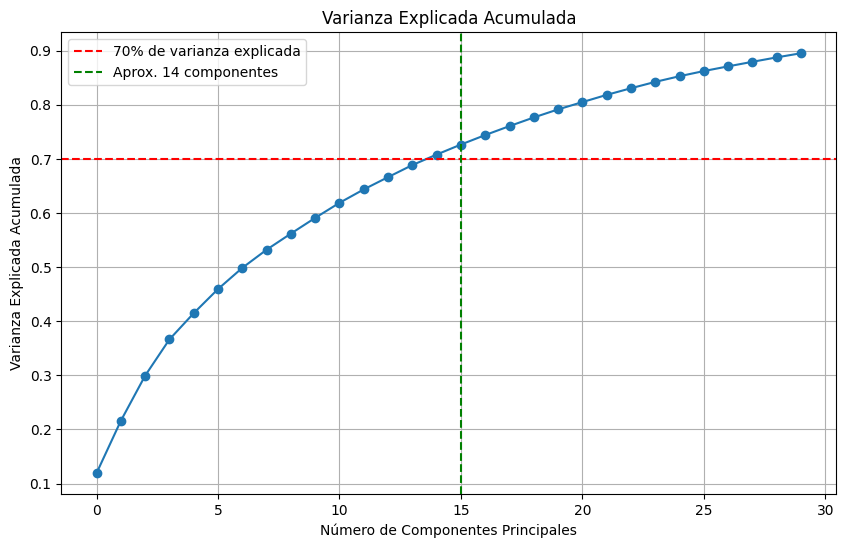

In [9]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Calcular PCA con 30 componentes sobre el conjunto de entrenamiento
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)

# Obtener la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficar la varianza explicada acumulada en función del número de componentes
plt.figure(figsize=(10, 6))
plt.plot(range(0, 30), cumulative_variance_ratio, marker='o')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.axhline(y=0.7, color='r', linestyle='--', label='70% de varianza explicada')
plt.axvline(x=np.where(cumulative_variance_ratio >= 0.7)[0][0] + 1, color='g', linestyle='--', label='Aprox. 14 componentes')
plt.legend()
plt.grid(True)
plt.show()


### h) Reconstruir los dígitos con 14 componentes de PCA y graficar en dos filas los 10 primeros dígitos originales (normalizados) de entrenamiento y los correspondientes reconstruidos para comparar las imágenes.


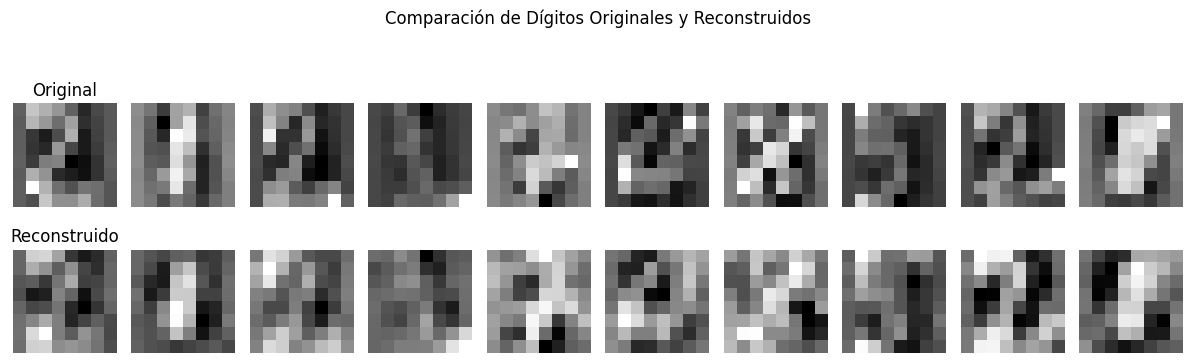

In [10]:
# Re-entrenar PCA con 14 componentes
pca_14 = PCA(n_components=14)
X_train_pca_14 = pca_14.fit_transform(X_train)

# Reconstruir los dígitos con 14 componentes
X_train_reconstructed = pca_14.inverse_transform(X_train_pca_14)

# Graficar los dígitos originales y los reconstruidos
fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12, 4))

# Graficar los 10 primeros dígitos originales
for i, ax in enumerate(axes[0]):
    ax.imshow(X_train_normalized[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

# Graficar los 10 primeros dígitos reconstruidos
for i, ax in enumerate(axes[1]):
    ax.imshow(X_train_reconstructed[i].reshape(8, 8), cmap='gray')
    ax.axis('off')

axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstruido")

plt.suptitle("Comparación de Dígitos Originales y Reconstruidos")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


### i) Entrenar y evaluar KNeighborsClassifier con valor de k óptimo, usando los sets transformados con PCA de 14 componentes. Evaluar el modelo usando las métricas del ítem (f) y comparar los resultados de ambos ítems. Expresar una conclusión.

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Entrenar el modelo KNeighborsClassifier con el valor de k óptimo
best_knn_model_pca = KNeighborsClassifier(n_neighbors=best_k)
best_knn_model_pca.fit(X_train_pca_14, y_train)

# Transformar el conjunto de prueba utilizando PCA de 14 componentes
X_test_pca_14 = pca_14.transform(X_test)

# Predecir las etiquetas del conjunto de prueba
y_pred_pca = best_knn_model_pca.predict(X_test_pca_14)

# Calcular métricas de evaluación
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')
f1_pca = f1_score(y_test, y_pred_pca, average='weighted')

# Mostrar las métricas de evaluación
print("Métricas de Evaluación utilizando PCA de 14 componentes:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precisión: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-score: {f1_pca:.4f}")

Métricas de Evaluación utilizando PCA de 14 componentes:
Accuracy: 0.9533
Precisión: 0.9545
Recall: 0.9533
F1-score: 0.9534


Este código entrena el modelo KNeighborsClassifier con el valor de k óptimo utilizando los datos transformados con PCA de 14 componentes (X_train_pca_14). Luego, se transforma el conjunto de prueba con PCA de 14 componentes (X_test_pca_14) y se evalúa el modelo utilizando las métricas de precisión, recall, F1-score y exactitud (accuracy).

Comparando estos resultados con las métricas obtenidas sin PCA, puedes hacer una conclusión sobre cómo la reducción de dimensionalidad afecta el rendimiento del modelo. Es probable que las métricas con PCA sean un poco más bajas debido a la pérdida de información al reducir la dimensionalidad, pero esto puede ser aceptable si se logra una reducción significativa en la complejidad del modelo y los tiempos de entrenamiento/evaluación.

## Parte 4: Datos con ruido



### j) Ofuscar las imágenes agregando ruido usando: np.random.normal(digits.data,2). Explicar en qué consiste esta transformación de los píxeles. ¿Qué tipo de ruido se agregó a las imágenes?


In [12]:
np.random.seed(42)
noisy = np.random.normal(X_train,2)
X_noisy = X_train + noisy

Aquí lo que se hace es almacenar en X_noisy una matriz de números aleatorios generados a partir de una distribución normal centrada en los valores de X y una dispersión dada por una desviación estándar de 4.

Luego, cada uno de estos ruidos se le agrega a cada una de las imágenes.

Vemos a continuación una comparación entre las primeras 20 imágenes, el ruido que se le agrega a cada una y la imagen con ruido. Luego, vemos las mismas imagenes con diferentes valores de la dispersión.


La transformación de los píxeles al agregar ruido usando np.random.normal(digits.data, 2) consiste en generar un ruido aleatorio gaussiano y agregarlo a cada píxel de las imágenes. En este caso, se utiliza la función np.random.normal para generar muestras aleatorias de una distribución normal (gaussiana) con una media de cero y una desviación estándar de 2. Estas muestras aleatorias se suman a los valores de los píxeles de las imágenes originales.

En términos simples, este proceso introduce variaciones aleatorias en los valores de los píxeles de las imágenes, lo que afecta su apariencia visual. La cantidad de ruido agregado está determinada por la desviación estándar especificada (en este caso, 2).

El tipo de ruido que se agrega a las imágenes es ruido gaussiano, también conocido como ruido aditivo gaussiano (Gaussian Additive Noise). Este tipo de ruido es aleatorio y sigue una distribución normal, lo que significa que los valores generados son más probables de estar cerca de cero y menos probables de estar lejos de cero, según la desviación estándar especificada. Este ruido puede tener un impacto diferente en la percepción visual dependiendo de la desviación estándar utilizada, ya que una desviación estándar mayor genera más variaciones aleatorias en los valores de los píxeles.


### k) Reproducir los tres ítems de la parte 3. Verificar en el gráfico ídem a (g) que 26 componentes explican el 75 % de la varianza acumulada.


IndexError: index 0 is out of bounds for axis 0 with size 0

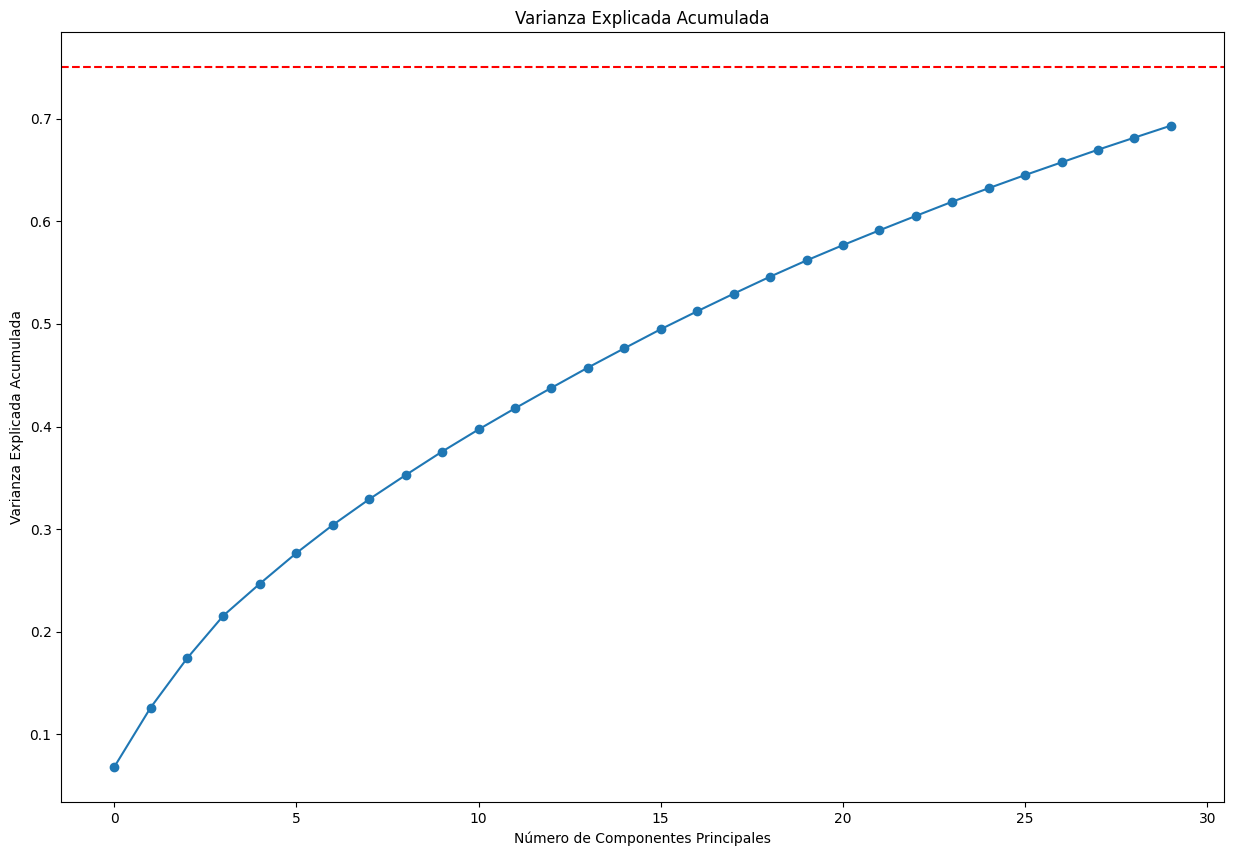

In [13]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Calcular PCA con 30 componentes sobre el conjunto de entrenamiento
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_noisy)

# Obtener la varianza explicada acumulada
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Graficar la varianza explicada acumulada en función del número de componentes
plt.figure(figsize=(15, 10))
plt.plot(range(0, 30), cumulative_variance_ratio, marker='o')
plt.title("Varianza Explicada Acumulada")
plt.xlabel("Número de Componentes Principales")
plt.ylabel("Varianza Explicada Acumulada")
plt.axhline(y=0.75, color='r', linestyle='--', label='70% de varianza explicada')
plt.axvline(x=np.where(cumulative_variance_ratio >= 0.75)[0][0] + 1, color='g', linestyle='--', label='Aprox. 14 componentes')
plt.legend()
plt.grid(True)
plt.show()


### l) Discutir cuál es el efecto y la utilidad de usar PCA sobre datos afectados por ruido.

In [ ]:
np.random.seed(42)
Xnoisy = np.random.normal(X, 2)

X_train, X_test, y_train, y_test = train_test_split(
    Xnoisy, y, test_size=0.25, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
fig, axes = plt.subplots(2, 10, figsize=(9,2),
                         subplot_kw={"xticks":[], "yticks":[],},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
  ax.imshow(X_train[i].reshape(8, 8), cmap="bone")

In [ ]:
pca30 = PCA(n_components=30, svd_solver="randomized", whiten=False)
D30 = pca30.fit(X_train)

In [ ]:
pca26 = PCA(n_components=30, svd_solver="randomized", whiten=False)
X_train26_t = pca26.fit(X_train).transform(X_train)
X_test26_t = pca26.transform(X_test)

X_train26 = pca26.inverse_transform(X_train26_t)